# Tugas Akhir DM Naive bayes


In [1]:
!pip install jcopml

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.3 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=88fcd716758466088a913db86b131e64674bfbe1150a4be666d9125d1145a3da
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built jcopml


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from jcopml.pipeline import num_pipe
from jcopml.plot import plot_confusion_matrix

In [3]:
# Load dataset
df = pd.read_csv('KondisiSuhuUdaraKet.csv', delimiter=',')
df

,Tanggal,Waktu,Karbon Monoksida,Sensitivitas Gas CO,Konsentrasi NMHC,Konsentrasi Benzena,Sensitivitas Gas Non-Methane Hydrocarbon (NMHC),Konsentrasi NOx,Sensitivitas Gas NOx,Konsentrasi NO2,Sensitivitas Gas NO2,Sensitivitas Gas O3,Suhu,Kelembaban,Absolute Humidity,keterangan
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,Suhu Lembab
1,2004-03-10,20:00:00,2.9,1371.00,164,11.539007,1033.50,207.0,983.25,128.0,1730.25,1036.50,90.000,96.000000,0.873589,Suhu Sangat Kering
2,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,Suhu Lembab
3,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,Suhu Lembab
4,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,Suhu Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9354,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,Suhu Lembab
9355,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,Suhu Lembab
9356,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,Suhu Lembab
9357,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866,Suhu Lembab


In [4]:
# Pisahkan atribut dan target
x = df.drop(columns='keterangan')
y = df['keterangan']
x

,Tanggal,Waktu,Karbon Monoksida,Sensitivitas Gas CO,Konsentrasi NMHC,Konsentrasi Benzena,Sensitivitas Gas Non-Methane Hydrocarbon (NMHC),Konsentrasi NOx,Sensitivitas Gas NOx,Konsentrasi NO2,Sensitivitas Gas NO2,Sensitivitas Gas O3,Suhu,Kelembaban,Absolute Humidity
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,20:00:00,2.9,1371.00,164,11.539007,1033.50,207.0,983.25,128.0,1730.25,1036.50,90.000,96.000000,0.873589
2,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
3,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
4,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9354,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9355,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9356,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9357,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [5]:
# Bagi dataset menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

x.shape, y.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9359, 15), (9359,), (5615, 15), (3744, 15), (5615,), (3744,))

In [6]:
# Definisikan transformer untuk preprocessing numerik
transformer = ColumnTransformer([
    ('numeric', num_pipe(), ['Karbon Monoksida', 'Sensitivitas Gas CO', 'Konsentrasi NMHC', 'Konsentrasi Benzena',
                             'Sensitivitas Gas Non-Methane Hydrocarbon (NMHC)', 'Konsentrasi NOx', 'Sensitivitas Gas NOx',
                             'Konsentrasi NO2', 'Sensitivitas Gas NO2', 'Sensitivitas Gas O3', 'Suhu', 'Kelembaban', 'Absolute Humidity'])
])

In [7]:
# Buat pipeline dengan preprocessing numerik dan model Gaussian Naive Bayes
pipeline = Pipeline([
    ('preprocess', transformer),
    ('model', GaussianNB())
])

In [8]:
# Latih model
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Karbon Monoksida',
                                                   'Sensitivitas Gas CO',
                                                   'Konsentrasi NMHC',
                                                   'Konsentrasi Benzena',
                                                   'Sensitivitas Gas '
                                                   'Non-Methane Hydrocarbon '
                                                   '(NMHC)',
                                                   'Konsentrasi NOx',
                                                   'Sensitivitas Gas NOx',
                                                   'Konsentrasi NO2',
                                                   'Sensitivitas Gas NO2',
                                                   'Sensitivitas Gas O3',
                                                   'Suhu', 'Kelembaban',
                                                   'Absolute Humidity'])])),
                ('model', GaussianNB())])

In [9]:
pipeline.score(x_train, y_train)

0.4678539626001781

In [10]:
pipeline.score(x_test, y_test)

0.46153846153846156

In [11]:
# Evaluasi model
train_score = pipeline.score(x_train, y_train)
test_score = pipeline.score(x_test, y_test)

In [12]:
# Tampilkan skor akurasi pada data uji
print("Skor akurasi pada data uji:", test_score)

Skor akurasi pada data uji: 0.46153846153846156


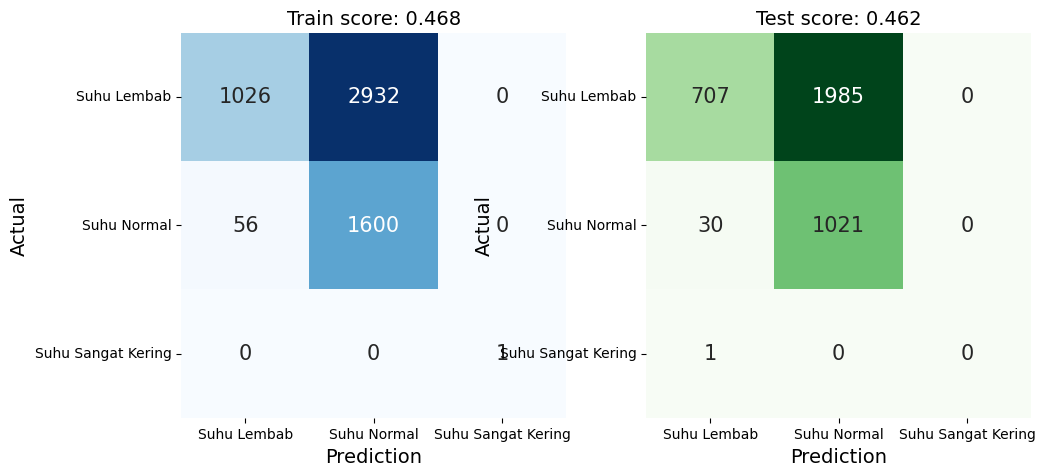

In [13]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(x_train, y_train, x_test, y_test, pipeline)

# Pengujian data

In [14]:
x_pred = pd.read_csv('testing.csv', delimiter=',')
x_pred

,Tanggal,Waktu,Karbon Monoksida,Sensitivitas Gas CO,Konsentrasi NMHC,Konsentrasi Benzena,Sensitivitas Gas Non-Methane Hydrocarbon (NMHC),Konsentrasi NOx,Sensitivitas Gas NOx,Konsentrasi NO2,Sensitivitas Gas NO2,Sensitivitas Gas O3,Suhu,Kelembaban,Absolute Humidity
0,10,20:00:00,2.2,1402.0,88,8.997817,939.25,131.00,1140.00,114.0,1554.50,1074.0,11.9,53.975000,0.750239
1,10,20:00:00,2.9,1371.0,164,11.539007,1033.50,207.00,983.25,128.0,1730.25,1036.5,90.0,96.000000,0.873589
2,10,20:00:00,2.9,1371.0,164,11.539007,1033.50,207.00,983.25,128.0,1730.25,1036.5,8.0,81.150000,0.873589
3,10,20:00:00,2.9,1371.0,164,11.539007,1033.50,207.00,983.25,128.0,1730.25,1036.5,-8.0,-81.150000,0.873589
4,10,20:00:00,2.9,1371.0,164,11.539007,1033.50,207.00,983.25,128.0,1730.25,1036.5,120.0,130.000000,0.873589
5,10,20:00:00,2.9,1371.0,164,11.539007,1033.50,207.00,983.25,128.0,1730.25,1036.5,-120.0,-30.000000,0.873589
6,2023-07-01,08:00,2.9,1371.0,164,11.539007,1033.50,207.00,983.25,128.0,1730.25,1036.5,8.0,81.150000,0.873589
7,2023-07-01,12:00,3.1,1372.5,163,11.562337,1033.50,207.00,976.50,127.5,1740.50,1043.5,8.3,79.150002,0.853229
8,2023-07-01,16:00,2.4,1291.0,161,11.500038,1023.00,201.00,963.75,123.5,1742.50,1043.5,8.0,79.699997,0.853229
9,2023-07-01,20:00,2.1,1181.5,161,11.500038,1004.00,191.25,938.25,116.5,1752.00,1038.5,7.8,78.449997,0.842373


In [15]:
pipeline.predict(x_pred)

array(['Suhu Normal', 'Suhu Sangat Kering', 'Suhu Normal', 'Suhu Lembab',
       'Suhu Lembab', 'Suhu Lembab', 'Suhu Normal', 'Suhu Normal',
       'Suhu Normal', 'Suhu Normal', 'Suhu Normal'], dtype='<U18')

In [16]:
x_pred['Prediksi-lulus']=pipeline.predict(x_pred)
x_pred

,Tanggal,Waktu,Karbon Monoksida,Sensitivitas Gas CO,Konsentrasi NMHC,Konsentrasi Benzena,Sensitivitas Gas Non-Methane Hydrocarbon (NMHC),Konsentrasi NOx,Sensitivitas Gas NOx,Konsentrasi NO2,Sensitivitas Gas NO2,Sensitivitas Gas O3,Suhu,Kelembaban,Absolute Humidity,Prediksi-lulus
0,10,20:00:00,2.2,1402.0,88,8.997817,939.25,131.00,1140.00,114.0,1554.50,1074.0,11.9,53.975000,0.750239,Suhu Normal
1,10,20:00:00,2.9,1371.0,164,11.539007,1033.50,207.00,983.25,128.0,1730.25,1036.5,90.0,96.000000,0.873589,Suhu Sangat Kering
2,10,20:00:00,2.9,1371.0,164,11.539007,1033.50,207.00,983.25,128.0,1730.25,1036.5,8.0,81.150000,0.873589,Suhu Normal
3,10,20:00:00,2.9,1371.0,164,11.539007,1033.50,207.00,983.25,128.0,1730.25,1036.5,-8.0,-81.150000,0.873589,Suhu Lembab
4,10,20:00:00,2.9,1371.0,164,11.539007,1033.50,207.00,983.25,128.0,1730.25,1036.5,120.0,130.000000,0.873589,Suhu Lembab
5,10,20:00:00,2.9,1371.0,164,11.539007,1033.50,207.00,983.25,128.0,1730.25,1036.5,-120.0,-30.000000,0.873589,Suhu Lembab
6,2023-07-01,08:00,2.9,1371.0,164,11.539007,1033.50,207.00,983.25,128.0,1730.25,1036.5,8.0,81.150000,0.873589,Suhu Normal
7,2023-07-01,12:00,3.1,1372.5,163,11.562337,1033.50,207.00,976.50,127.5,1740.50,1043.5,8.3,79.150002,0.853229,Suhu Normal
8,2023-07-01,16:00,2.4,1291.0,161,11.500038,1023.00,201.00,963.75,123.5,1742.50,1043.5,8.0,79.699997,0.853229,Suhu Normal
9,2023-07-01,20:00,2.1,1181.5,161,11.500038,1004.00,191.25,938.25,116.5,1752.00,1038.5,7.8,78.449997,0.842373,Suhu Normal
